In [ ]:
!pip install adjustText

In [ ]:
# Import necessary libraries
from transformers import AutoTokenizer, AutoModelForCausalLM, StoppingCriteria, StoppingCriteriaList
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import pdist
from scipy.linalg import eigh
from adjustText import adjust_text  # For non-overlapping text labels

In [ ]:
# Custom stopping criteria to limit response length
class MaxLengthCriteria(StoppingCriteria):
    def __init__(self, max_length):
        self.max_length = max_length
    def __call__(self, input_ids, scores, **kwargs):
        return input_ids.shape[1] >= self.max_length

# Step 1: Model and Tokenizer Setup
model_name = "meta-llama/Llama-2-7b-hf"
hf_token = ""  # Actual Hugging Face token

# Load tokenizer and model with token
tokenizer = AutoTokenizer.from_pretrained(model_name, token=hf_token)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    token=hf_token,
    device_map="auto",
    offload_folder="offload",
    torch_dtype=torch.float16
)
model.eval()

# Step 2: Generate Response
input_text = "How are you?"
inputs = tokenizer(input_text, return_tensors="pt", add_special_tokens=True)
input_ids = inputs["input_ids"].to("cuda" if torch.cuda.is_available() else "cpu")
attention_mask = inputs["attention_mask"].to("cuda" if torch.cuda.is_available() else "cpu")
with torch.no_grad():
    stopping_criteria = StoppingCriteriaList([MaxLengthCriteria(max_length=10)])  # Limit to 10 tokens
    generated_ids = model.generate(
        input_ids,
        max_length=15,
        pad_token_id=tokenizer.eos_token_id,
        attention_mask=attention_mask,
        no_repeat_ngram_size=2,  # Prevent repetition of input
        stopping_criteria=stopping_criteria
    )
    full_output = tokenizer.decode(generated_ids[0], skip_special_tokens=False)
    input_len = input_ids.shape[1]
    response_ids = generated_ids[0][input_len:]  # Remove input tokens
    response = tokenizer.decode(response_ids, skip_special_tokens=True)
    print(f"Generated response: {response}")

# Step 3: Tokenize Input and Response
input_token_strs = [tokenizer.decode([token_id], skip_special_tokens=False).strip() for token_id in input_ids[0]]
input_token_strs = [t for t in input_token_strs if t]  # ['<s>', 'How', 'are', 'you', '?']
response_inputs = tokenizer(response, add_special_tokens=True, return_tensors="pt")
response_input_ids = response_inputs["input_ids"].to("cuda" if torch.cuda.is_available() else "cpu")
response_token_strs = [tokenizer.decode([token_id], skip_special_tokens=False).strip() for token_id in response_input_ids[0]]
response_token_strs = [t for t in response_token_strs if t]  # e.g., ['<s>', 'We', 'hope', 'you', '</s>']
print(f"Response tokens: {response_token_strs}")

# Step 4: Construct Cumulative Sequences
sequences = []
# Start with input tokens + first <s>
cumulative_seq = input_token_strs + ['<s>']
sequences.append(cumulative_seq)
# Add each response token progressively
for token in response_token_strs[1:]:  # Start from first response token after <s>
    cumulative_seq = cumulative_seq + [token]
    sequences.append(cumulative_seq.copy())
sequence_names = [' '.join(seq) for seq in sequences]  # Full sequence string for each

`torch_dtype` is deprecated! Use `dtype` instead!


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Generated response: I hope you are doing
Response tokens: ['<s>', 'I', 'hope', 'you', 'are', 'doing']


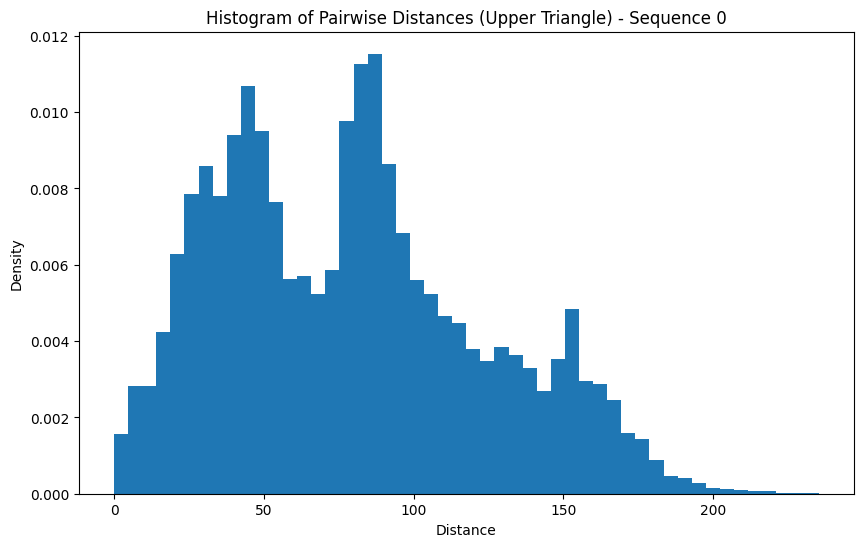


Processing Sequence 0 (<s> How are you ? <s>): k=5, percentile=95%, gamma=0.0000
Reduced shape for Sequence 0, k5_p95: (33, 9, 2)

Processing Sequence 0 (<s> How are you ? <s>): k=5, percentile=90%, gamma=0.0000
Reduced shape for Sequence 0, k5_p90: (33, 9, 2)

Processing Sequence 0 (<s> How are you ? <s>): k=5, percentile=80%, gamma=0.0000
Reduced shape for Sequence 0, k5_p80: (33, 9, 2)

Processing Sequence 0 (<s> How are you ? <s>): k=5, percentile=70%, gamma=0.0001
Reduced shape for Sequence 0, k5_p70: (33, 9, 2)

Processing Sequence 0 (<s> How are you ? <s>): k=10, percentile=95%, gamma=0.0000
Reduced shape for Sequence 0, k10_p95: (33, 9, 2)

Processing Sequence 0 (<s> How are you ? <s>): k=10, percentile=90%, gamma=0.0000
Reduced shape for Sequence 0, k10_p90: (33, 9, 2)

Processing Sequence 0 (<s> How are you ? <s>): k=10, percentile=80%, gamma=0.0000
Reduced shape for Sequence 0, k10_p80: (33, 9, 2)

Processing Sequence 0 (<s> How are you ? <s>): k=10, percentile=70%, gamma=0

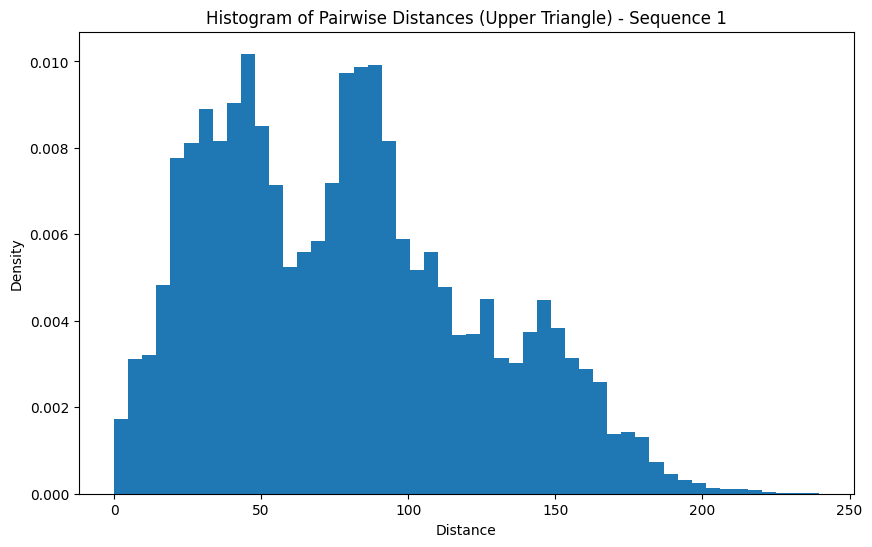


Processing Sequence 1 (<s> How are you ? <s> I): k=5, percentile=95%, gamma=0.0000
Reduced shape for Sequence 1, k5_p95: (33, 11, 2)

Processing Sequence 1 (<s> How are you ? <s> I): k=5, percentile=90%, gamma=0.0000
Reduced shape for Sequence 1, k5_p90: (33, 11, 2)

Processing Sequence 1 (<s> How are you ? <s> I): k=5, percentile=80%, gamma=0.0000
Reduced shape for Sequence 1, k5_p80: (33, 11, 2)

Processing Sequence 1 (<s> How are you ? <s> I): k=5, percentile=70%, gamma=0.0001
Reduced shape for Sequence 1, k5_p70: (33, 11, 2)

Processing Sequence 1 (<s> How are you ? <s> I): k=10, percentile=95%, gamma=0.0000
Reduced shape for Sequence 1, k10_p95: (33, 11, 2)

Processing Sequence 1 (<s> How are you ? <s> I): k=10, percentile=90%, gamma=0.0000
Reduced shape for Sequence 1, k10_p90: (33, 11, 2)

Processing Sequence 1 (<s> How are you ? <s> I): k=10, percentile=80%, gamma=0.0000
Reduced shape for Sequence 1, k10_p80: (33, 11, 2)

Processing Sequence 1 (<s> How are you ? <s> I): k=10, 

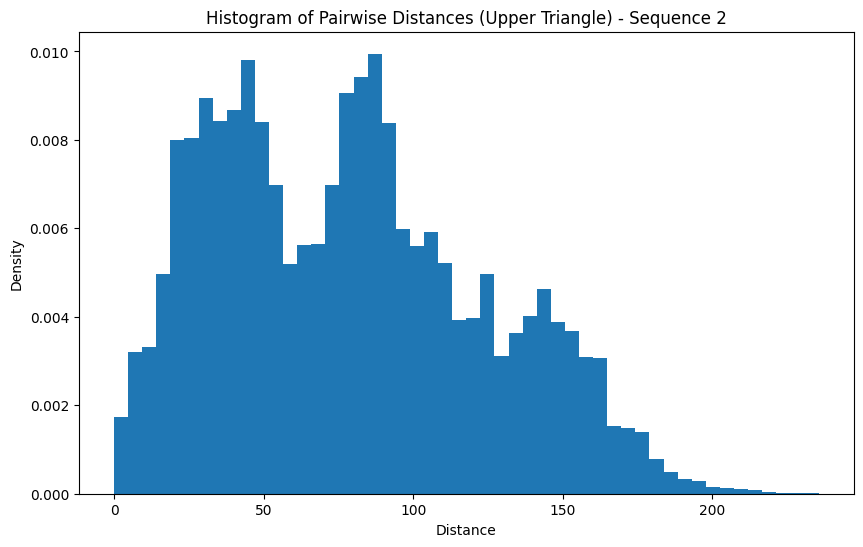


Processing Sequence 2 (<s> How are you ? <s> I hope): k=5, percentile=95%, gamma=0.0000
Reduced shape for Sequence 2, k5_p95: (33, 12, 2)

Processing Sequence 2 (<s> How are you ? <s> I hope): k=5, percentile=90%, gamma=0.0000
Reduced shape for Sequence 2, k5_p90: (33, 12, 2)

Processing Sequence 2 (<s> How are you ? <s> I hope): k=5, percentile=80%, gamma=0.0000
Reduced shape for Sequence 2, k5_p80: (33, 12, 2)

Processing Sequence 2 (<s> How are you ? <s> I hope): k=5, percentile=70%, gamma=0.0000
Reduced shape for Sequence 2, k5_p70: (33, 12, 2)

Processing Sequence 2 (<s> How are you ? <s> I hope): k=10, percentile=95%, gamma=0.0000
Reduced shape for Sequence 2, k10_p95: (33, 12, 2)

Processing Sequence 2 (<s> How are you ? <s> I hope): k=10, percentile=90%, gamma=0.0000
Reduced shape for Sequence 2, k10_p90: (33, 12, 2)

Processing Sequence 2 (<s> How are you ? <s> I hope): k=10, percentile=80%, gamma=0.0000
Reduced shape for Sequence 2, k10_p80: (33, 12, 2)

Processing Sequence 

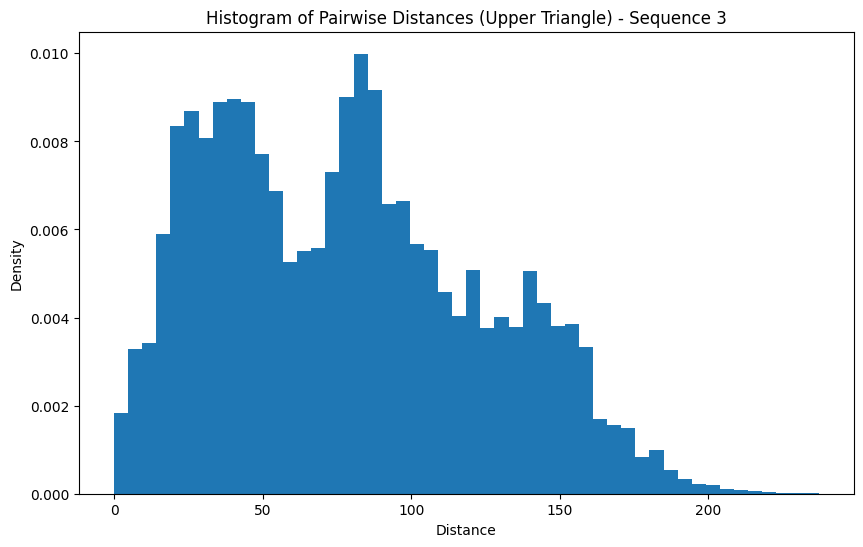


Processing Sequence 3 (<s> How are you ? <s> I hope you): k=5, percentile=95%, gamma=0.0000
Reduced shape for Sequence 3, k5_p95: (33, 13, 2)

Processing Sequence 3 (<s> How are you ? <s> I hope you): k=5, percentile=90%, gamma=0.0000
Reduced shape for Sequence 3, k5_p90: (33, 13, 2)

Processing Sequence 3 (<s> How are you ? <s> I hope you): k=5, percentile=80%, gamma=0.0000
Reduced shape for Sequence 3, k5_p80: (33, 13, 2)

Processing Sequence 3 (<s> How are you ? <s> I hope you): k=5, percentile=70%, gamma=0.0000
Reduced shape for Sequence 3, k5_p70: (33, 13, 2)

Processing Sequence 3 (<s> How are you ? <s> I hope you): k=10, percentile=95%, gamma=0.0000
Reduced shape for Sequence 3, k10_p95: (33, 13, 2)

Processing Sequence 3 (<s> How are you ? <s> I hope you): k=10, percentile=90%, gamma=0.0000
Reduced shape for Sequence 3, k10_p90: (33, 13, 2)

Processing Sequence 3 (<s> How are you ? <s> I hope you): k=10, percentile=80%, gamma=0.0000
Reduced shape for Sequence 3, k10_p80: (33, 

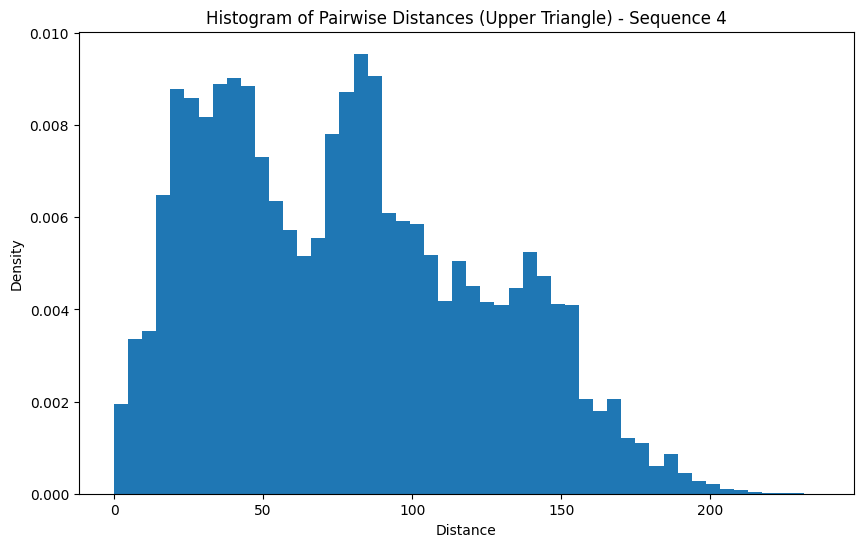


Processing Sequence 4 (<s> How are you ? <s> I hope you are): k=5, percentile=95%, gamma=0.0000
Reduced shape for Sequence 4, k5_p95: (33, 14, 2)

Processing Sequence 4 (<s> How are you ? <s> I hope you are): k=5, percentile=90%, gamma=0.0000
Reduced shape for Sequence 4, k5_p90: (33, 14, 2)

Processing Sequence 4 (<s> How are you ? <s> I hope you are): k=5, percentile=80%, gamma=0.0000
Reduced shape for Sequence 4, k5_p80: (33, 14, 2)

Processing Sequence 4 (<s> How are you ? <s> I hope you are): k=5, percentile=70%, gamma=0.0000
Reduced shape for Sequence 4, k5_p70: (33, 14, 2)

Processing Sequence 4 (<s> How are you ? <s> I hope you are): k=10, percentile=95%, gamma=0.0000
Reduced shape for Sequence 4, k10_p95: (33, 14, 2)

Processing Sequence 4 (<s> How are you ? <s> I hope you are): k=10, percentile=90%, gamma=0.0000
Reduced shape for Sequence 4, k10_p90: (33, 14, 2)

Processing Sequence 4 (<s> How are you ? <s> I hope you are): k=10, percentile=80%, gamma=0.0000
Reduced shape fo

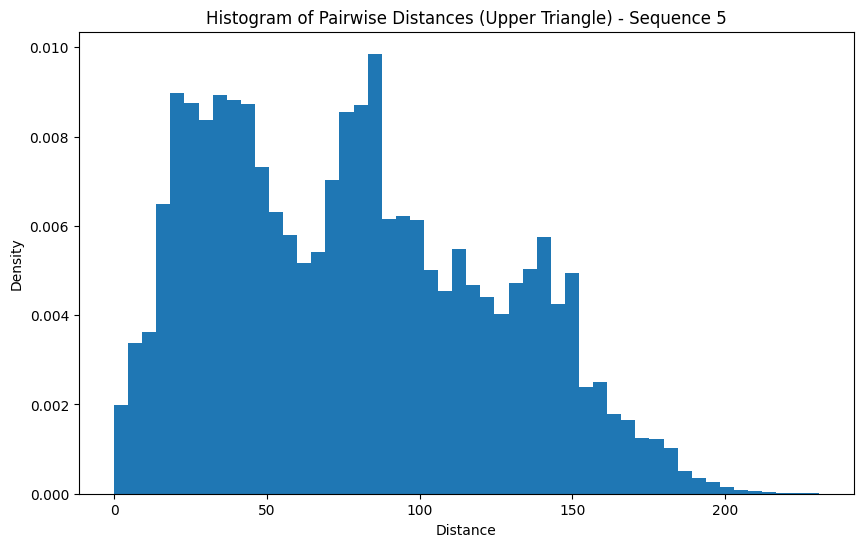


Processing Sequence 5 (<s> How are you ? <s> I hope you are doing): k=5, percentile=95%, gamma=0.0000
Reduced shape for Sequence 5, k5_p95: (33, 15, 2)

Processing Sequence 5 (<s> How are you ? <s> I hope you are doing): k=5, percentile=90%, gamma=0.0000
Reduced shape for Sequence 5, k5_p90: (33, 15, 2)

Processing Sequence 5 (<s> How are you ? <s> I hope you are doing): k=5, percentile=80%, gamma=0.0000
Reduced shape for Sequence 5, k5_p80: (33, 15, 2)

Processing Sequence 5 (<s> How are you ? <s> I hope you are doing): k=5, percentile=70%, gamma=0.0000
Reduced shape for Sequence 5, k5_p70: (33, 15, 2)

Processing Sequence 5 (<s> How are you ? <s> I hope you are doing): k=10, percentile=95%, gamma=0.0000
Reduced shape for Sequence 5, k10_p95: (33, 15, 2)

Processing Sequence 5 (<s> How are you ? <s> I hope you are doing): k=10, percentile=90%, gamma=0.0000
Reduced shape for Sequence 5, k10_p90: (33, 15, 2)

Processing Sequence 5 (<s> How are you ? <s> I hope you are doing): k=10, per

In [ ]:
# Step 5: Process Each Sequence and Laplacian Eigenmaps Reduction
all_reduced = {}  # Nested dict: sequence_name -> combination_key -> reduced
percentiles = [95, 90, 80, 70]
ks = [5, 10, 20]

for seq_idx, (seq, name) in enumerate(zip(sequences, sequence_names)):
    # Tokenize the sequence
    seq_ids = tokenizer(" ".join(seq), return_tensors="pt", add_special_tokens=False)["input_ids"].to("cuda" if torch.cuda.is_available() else "cpu")
    if seq_ids[0][-1] != tokenizer.eos_token_id:
        seq_ids = torch.cat([seq_ids, torch.tensor([[tokenizer.eos_token_id]], device=seq_ids.device)], dim=1)
    # Get hidden states
    with torch.no_grad():
        outputs = model(seq_ids, output_hidden_states=True)
        hidden_states = outputs.hidden_states
    # Convert to numpy
    num_layers = len(hidden_states)
    num_tokens = seq_ids.shape[1]
    embed_dim = hidden_states[0].shape[-1]
    layer_matrix = np.stack([hs[0].cpu().numpy() for hs in hidden_states])
    # Preprocessing and Normalization
    reshaped = layer_matrix.reshape(-1, embed_dim)
    scaler = StandardScaler()
    reshaped_normalized = scaler.fit_transform(reshaped)

      # Compute Pairwise Distances and Plot Histogram (per sequence)
    dists = pdist(reshaped_normalized, metric='euclidean')
    plt.figure(figsize=(10, 6))
    plt.hist(dists, bins=50, density=True)
    plt.title(f'Histogram of Pairwise Distances (Upper Triangle) - Sequence {seq_idx}')
    plt.xlabel('Distance')
    plt.ylabel('Density')
    plt.savefig(f'upper_triangle_dist_hist_seq{seq_idx}.png')
    plt.show()

    # Compute percentiles for sigma and gamma
    sigmas = np.percentile(dists, percentiles)
    gammas = 1 / (2 * sigmas ** 2)

    # Store for this sequence
    all_reduced[name] = {}

    # Laplacian Eigenmaps with Parameter Combinations
    for k in ks:
        for idx, gamma in enumerate(gammas):
            p = percentiles[idx]
            print(f"\nProcessing Sequence {seq_idx} ({name}): k={k}, percentile={p}%, gamma={gamma:.4f}")

            n = reshaped_normalized.shape[0]
            nbrs = NearestNeighbors(n_neighbors=k + 1, metric='euclidean').fit(reshaped_normalized)
            distances, indices = nbrs.kneighbors(reshaped_normalized)

            # Build symmetric weight matrix W
            W = np.zeros((n, n))
            for i in range(n):
                for j in range(1, k + 1):  # Skip self (j=0)
                    neighbor = indices[i, j]
                    dist = distances[i, j]
                    w = np.exp(-gamma * dist ** 2)
                    W[i, neighbor] = w
                    W[neighbor, i] = w

            # Graph Laplacian
            d_ii = np.sum(W, axis=1)
            D = np.diag(d_ii)
            L = D - W

            # Solve generalized eigenvalue problem
            vals, vecs = eigh(L, D)
            sorted_idx = np.argsort(vals)
            vals = vals[sorted_idx]
            vecs = vecs[:, sorted_idx]

            # Take next 2 eigenvectors for 2D embedding
            Y = vecs[:, 1:3]

            # Reshape back to (num_layers, num_tokens, 2)
            reduced = Y.reshape(num_layers, num_tokens, 2)
            combination_key = f'k{k}_p{p}'
            all_reduced[name][combination_key] = reduced
            print(f"Reduced shape for Sequence {seq_idx}, {combination_key}: {reduced.shape}")

166 [0.27767894 0.59070507]
178 [-0.77778415 -0.93972218]
48 [0.79558582 0.62155014]
54 [0.39562704 0.17952937]
66 [ 0.81351007 -0.26252236]
84 [ 0.08136073 -0.47849261]
96 [-0.95514186 -0.49662781]
127 [-0.59204755 -0.07524375]
145 [ 0.81574867 -0.23657207]
6 [ 0.97267446 -0.7796044 ]
11 [-0.11862564 -0.85220775]
133 [-0.65026086 -0.87846905]
157 [ 0.97795882 -0.82084749]
12 [-0.48175126 -0.75566045]
42 [0.05929604 0.15891913]
72 [ 0.87924751 -0.77750537]
60 [ 0.11695086 -0.80012773]
90 [ 0.39289752 -0.02438128]
138 [-0.13672774 -0.48038135]
156 [0.10093746 0.20653674]
162 [-0.98155157  0.21029429]
114 [0.5634191  0.82938519]
144 [-0.27255885 -0.01320914]
168 [0.24229358 0.85048987]
174 [-0.62771791  0.65539973]
180 [-0.24360947  0.36488883]
102 [-0.02764994 -0.35929581]
120 [0.71374159 0.50551752]
126 [ 0.70694432 -0.99633953]
132 [0.21291821 0.37344603]


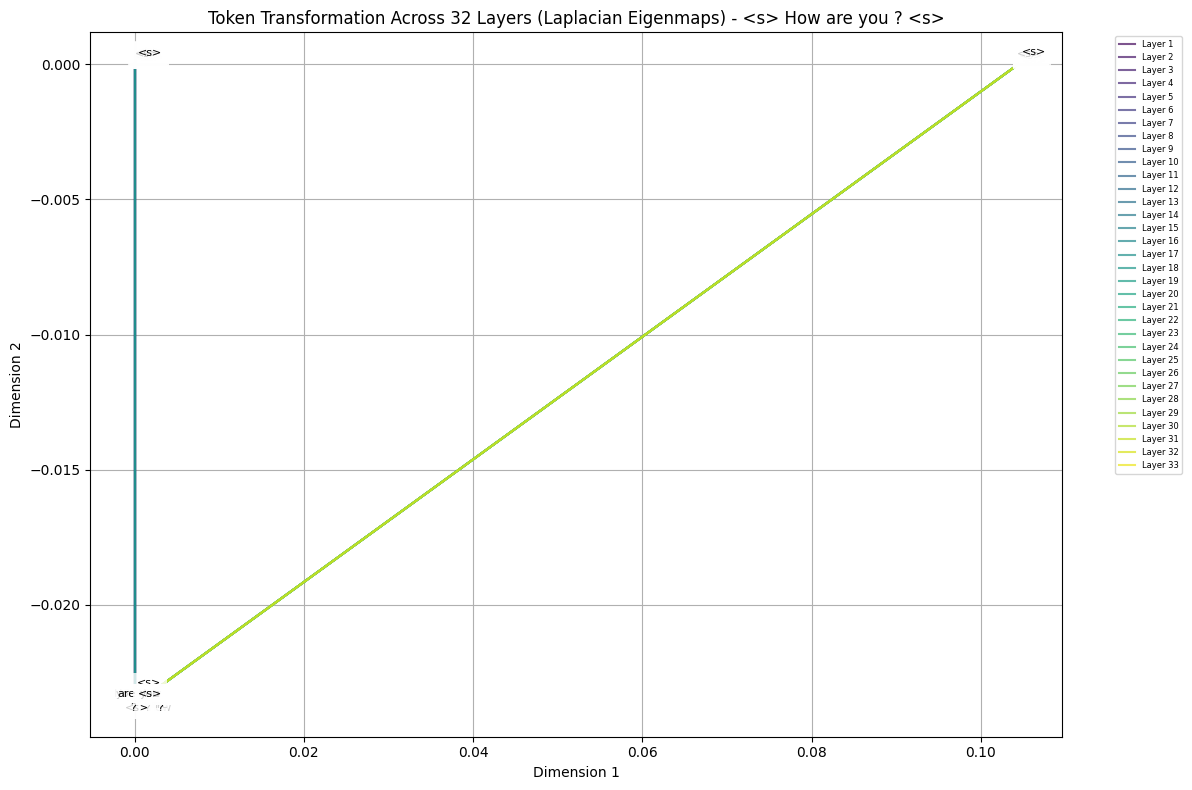

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

# Assuming all_reduced is populated from your earlier code
# Example structure: all_reduced[name][combination_key] = reduced (num_layers, num_tokens, 2)

# Get the first sequence and combination for simplicity
name = list(all_reduced.keys())[0]
combination_key = list(all_reduced[name].keys())[0]
reduced = all_reduced[name][combination_key]  # Shape: (32, num_tokens, 2)
seq = sequences[sequence_names.index(name)]  # Corresponding token sequence
num_layers = reduced.shape[0]
num_tokens = reduced.shape[1]

# Create a color palette for 32 layers
layer_colors = sns.color_palette("viridis", num_layers)

plt.figure(figsize=(12, 8))
texts = []  # For non-overlapping token labels

# Plot each layer as a line connecting tokens
for layer_idx in range(num_layers):
    coords = reduced[layer_idx]  # 2D coordinates for this layer
    plt.plot(coords[:, 0], coords[:, 1], '-', color=layer_colors[layer_idx],
             label=f"Layer {layer_idx + 1}", alpha=0.7)
    # Label each token
    for j, token in enumerate(seq):
        texts.append(plt.text(coords[j, 0], coords[j, 1], token, fontsize=8,
                             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none')))

# Adjust text to avoid overlap
adjust_text(texts)

plt.title(f"Token Transformation Across 32 Layers (Laplacian Eigenmaps) - {name}")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=6)
plt.tight_layout()
plt.savefig(f'transformation_{name.replace(" ", "_")}_{combination_key}.png')
plt.show()

In [ ]:
!pip install adjustText

In [ ]:
    # Import necessary libraries
from transformers import AutoTokenizer, AutoModelForCausalLM, StoppingCriteria, StoppingCriteriaList
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import pdist
from scipy.linalg import eigh
from adjustText import adjust_text  # For non-overlapping text labels

In [ ]:
  from transformers import StoppingCriteria
   # Custom stopping criteria to limit response length
class MaxLengthCriteria(StoppingCriteria):
    def __init__(self, max_length):
        self.max_length = max_length
    def __call__(self, input_ids, scores, **kwargs):
        return input_ids.shape[1] >= self.max_length

# Step 1: Model and Tokenizer Setup
model_name = "meta-llama/Llama-2-7b-hf"
hf_token = ""  # Actual Hugging Face token

# Load tokenizer and model with token
tokenizer = AutoTokenizer.from_pretrained(model_name, token=hf_token)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    token=hf_token,
    device_map="auto",
    offload_folder="offload",
    torch_dtype=torch.float16
)
model.eval()

# Step 2: Generate Response
input_text = "How are you?"
inputs = tokenizer(input_text, return_tensors="pt", add_special_tokens=True)
input_ids = inputs["input_ids"].to("cuda" if torch.cuda.is_available() else "cpu")
attention_mask = inputs["attention_mask"].to("cuda" if torch.cuda.is_available() else "cpu")
with torch.no_grad():
    stopping_criteria = StoppingCriteriaList([MaxLengthCriteria(max_length=12)])  # Limit to 10 tokens
    generated_ids = model.generate(
        input_ids,
        max_length=15,
        pad_token_id=tokenizer.eos_token_id,
        attention_mask=attention_mask,
        no_repeat_ngram_size=2,  # Prevent repetition of input
        stopping_criteria=stopping_criteria
    )
    full_output = tokenizer.decode(generated_ids[0], skip_special_tokens=False)
    input_len = input_ids.shape[1]
    response_ids = generated_ids[0][input_len:]  # Remove input tokens
    response = tokenizer.decode(response_ids, skip_special_tokens=True)
    print(f"Generated response: {response}")

# Step 3: Tokenize Input and Response
input_token_strs = [tokenizer.decode([token_id], skip_special_tokens=False).strip() for token_id in input_ids[0]]
input_token_strs = [t for t in input_token_strs if t]  # ['<s>', 'How', 'are', 'you', '?']
response_inputs = tokenizer(response, add_special_tokens=True, return_tensors="pt")
response_input_ids = response_inputs["input_ids"].to("cuda" if torch.cuda.is_available() else "cpu")
response_token_strs = [tokenizer.decode([token_id], skip_special_tokens=False).strip() for token_id in response_input_ids[0]]
response_token_strs = [t for t in response_token_strs if t]  # e.g., ['<s>', 'We', 'hope', 'you', '</s>']
print(f"Response tokens: {response_token_strs}")

# Step 4: Construct Cumulative Sequences
sequences = []
# Start with input tokens + first <s>
cumulative_seq = input_token_strs + ['<s>']
sequences.append(cumulative_seq)
# Add each response token progressively
for token in response_token_strs[1:]:  # Start from first response token after <s>
    cumulative_seq = cumulative_seq + [token]
    sequences.append(cumulative_seq.copy())
sequence_names = [' '.join(seq) for seq in sequences]  # Full sequence string for each

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Generated response: I'm so glad you'
Response tokens: ['<s>', 'I', "'", 'm', 'so', 'glad', 'you', "'"]


In [ ]:
# Step 5: Process Each Sequence and Laplacian Eigenmaps Reduction
all_reduced = {}  # Nested dict: sequence_name -> combination_key -> reduced
percentiles = [95, 90, 80, 70]
ks = [5, 10, 20]

for seq_idx, (seq, name) in enumerate(zip(sequences, sequence_names)):
    # Tokenize the sequence
    seq_ids = tokenizer(" ".join(seq), return_tensors="pt", add_special_tokens=False)["input_ids"].to("cuda" if torch.cuda.is_available() else "cpu")
    if seq_ids[0][-1] != tokenizer.eos_token_id:
        seq_ids = torch.cat([seq_ids, torch.tensor([[tokenizer.eos_token_id]], device=seq_ids.device)], dim=1)
    # Get hidden states
    with torch.no_grad():
        outputs = model(seq_ids, output_hidden_states=True)
        hidden_states = outputs.hidden_states
    # Convert to numpy
    num_layers = len(hidden_states)
    num_tokens = seq_ids.shape[1]
    embed_dim = hidden_states[0].shape[-1]
    layer_matrix = np.stack([hs[0].cpu().numpy() for hs in hidden_states])
    # Preprocessing and Normalization
    reshaped = layer_matrix.reshape(-1, embed_dim)
    scaler = StandardScaler()
    reshaped_normalized = scaler.fit_transform(reshaped)

    # Compute Pairwise Distances and Plot Histogram (per sequence)
    dists = pdist(reshaped_normalized, metric='euclidean')
    plt.figure(figsize=(10, 6))
    plt.hist(dists, bins=50, density=True)
    plt.title(f'Histogram of Pairwise Distances (Upper Triangle) - Sequence {seq_idx}')
    plt.xlabel('Distance')
    plt.ylabel('Density')
    plt.savefig(f'upper_triangle_dist_hist_seq{seq_idx}.png')
    plt.close()

    # Compute percentiles for sigma and gamma
    sigmas = np.percentile(dists, percentiles)
    gammas = 1 / (2 * sigmas ** 2)

    # Store for this sequence
    all_reduced[name] = {}

    # Laplacian Eigenmaps with Parameter Combinations
    for k in ks:
        for idx, gamma in enumerate(gammas):
            p = percentiles[idx]
            print(f"\nProcessing Sequence {seq_idx} ({name}): k={k}, percentile={p}%, gamma={gamma:.4f}")

            n = reshaped_normalized.shape[0]
            nbrs = NearestNeighbors(n_neighbors=k + 1, metric='euclidean').fit(reshaped_normalized)
            distances, indices = nbrs.kneighbors(reshaped_normalized)

            # Build symmetric weight matrix W
            W = np.zeros((n, n))
            for i in range(n):
                for j in range(1, k + 1):  # Skip self (j=0)
                    neighbor = indices[i, j]
                    dist = distances[i, j]
                    w = np.exp(-gamma * dist ** 2)
                    W[i, neighbor] = w
                    W[neighbor, i] = w

            # Graph Laplacian
            d_ii = np.sum(W, axis=1)
            D = np.diag(d_ii)
            L = D - W

            # Solve generalized eigenvalue problem
            vals, vecs = eigh(L, D)
            sorted_idx = np.argsort(vals)
            vals = vals[sorted_idx]
            vecs = vecs[:, sorted_idx]

            # Take next 2 eigenvectors for 2D embedding
            Y = vecs[:, 1:3]

            # Reshape back to (num_layers, num_tokens, 2)
            reduced = Y.reshape(num_layers, num_tokens, 2)
            combination_key = f'k{k}_p{p}'
            all_reduced[name][combination_key] = reduced
            print(f"Reduced shape for Sequence {seq_idx}, {combination_key}: {reduced.shape}")


Processing Sequence 0 (<s> How are you ? <s>): k=5, percentile=95%, gamma=0.0000
Reduced shape for Sequence 0, k5_p95: (33, 9, 2)

Processing Sequence 0 (<s> How are you ? <s>): k=5, percentile=90%, gamma=0.0000
Reduced shape for Sequence 0, k5_p90: (33, 9, 2)

Processing Sequence 0 (<s> How are you ? <s>): k=5, percentile=80%, gamma=0.0000
Reduced shape for Sequence 0, k5_p80: (33, 9, 2)

Processing Sequence 0 (<s> How are you ? <s>): k=5, percentile=70%, gamma=0.0001
Reduced shape for Sequence 0, k5_p70: (33, 9, 2)

Processing Sequence 0 (<s> How are you ? <s>): k=10, percentile=95%, gamma=0.0000
Reduced shape for Sequence 0, k10_p95: (33, 9, 2)

Processing Sequence 0 (<s> How are you ? <s>): k=10, percentile=90%, gamma=0.0000
Reduced shape for Sequence 0, k10_p90: (33, 9, 2)

Processing Sequence 0 (<s> How are you ? <s>): k=10, percentile=80%, gamma=0.0000
Reduced shape for Sequence 0, k10_p80: (33, 9, 2)

Processing Sequence 0 (<s> How are you ? <s>): k=10, percentile=70%, gamma=0

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

# Debug: Check all_reduced content
print("all_reduced content:", all_reduced)
for name, reductions in all_reduced.items():
    print(f"Name: {name}, Reductions: {reductions.keys()}")

# Visualization
transformer_layers = range(32)  # 0 to 31 for 32 layers
layer_colors = sns.color_palette("husl", 32)  # 32 colors

for name, reductions in all_reduced.items():
    for combination_key, reduced in reductions.items():
        k, p = map(int, combination_key.replace('k', '').split('_p'))
        print(f"Reduced shape for {combination_key}: {reduced.shape}")  # Debug shape
        plt.figure(figsize=(12, 8))
        texts = []  # For adjustText
        seq = sequences[sequence_names.index(name)]  # Get corresponding seq
        for layer_idx in transformer_layers:
            coords = reduced[layer_idx]
            print(f"Layer {layer_idx} coords shape: {coords.shape}")  # Debug coords
            plt.plot(coords[:, 0], coords[:, 1], marker='o', color=layer_colors[layer_idx],
                     label=f"Layer {layer_idx + 1}")
            for j, token in enumerate(seq):
                texts.append(
                    plt.text(
                        coords[j, 0],
                        coords[j, 1],
                        token,
                        fontsize=10,
                        bbox=dict(facecolor='white', alpha=0.9, edgecolor='black', boxstyle='round,pad=0.2')
                    )
                )
        adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))
        plt.title(f"Trajectory of Sequence '{name}' Across 32 Layers (k={k}, percentile={p}%) - Laplacian Eigenmaps")
        plt.xlabel("Laplacian Eigenmaps Dimension 1")
        plt.ylabel("Laplacian Eigenmaps Dimension 2")
        plt.grid(True)
        plt.legend(fontsize=6, ncol=2)
        plt.tight_layout()
        plt.savefig(f'trajectory_{name.replace(" ", "_")}_k{k}_p{p}.png')
        plt.show()  # Display plot instead of closing
        # plt.close()  # Comment out to debug

# Graph 1: Display the response
plt.figure(figsize=(10, 2))
plt.text(0.5, 0.5, f"Generated Response: {response}", ha='center', va='center', fontsize=12)
plt.axis('off')
plt.title("Generated Response")
plt.tight_layout()
plt.show()

In [ ]:
!pip install adjustText

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

# Step 6: Visualization
transformer_layers = range(1, 33)  # 32 transformer layers
layer_colors = sns.color_palette("husl", 32)  # 32 colors

for name, reductions in all_reduced.items():
    for combination_key, reduced in reductions.items():
        k, p = map(int, combination_key.replace('k', '').split('_p'))
        plt.figure(figsize=(12, 8))
        texts = []  # For adjustText
        seq = sequences[sequence_names.index(name)]  # Get corresponding sequence
        for layer_idx in transformer_layers:
            coords = reduced[layer_idx - 1]  # Adjust for 0-based indexing
            plt.plot(coords[:, 0], coords[:, 1], marker='o', color=layer_colors[layer_idx - 1], label=f"Layer {layer_idx}")
            for j, token in enumerate(seq):
                texts.append(
                    plt.text(
                        coords[j, 0],
                        coords[j, 1],
                        token,
                        fontsize=10,
                        bbox=dict(facecolor='white', alpha=0.9, edgecolor='black', boxstyle='round,pad=0.2')
                    )
                )
        # Adjust text labels to avoid overlap
        adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))
        plt.title(f"Trajectory of Sequence '{name}' Across 32 Layers (k={k}, percentile={p}%) - Laplacian Eigenmaps")
        plt.xlabel("Laplacian Eigenmaps Dimension 1")
        plt.ylabel("Laplacian Eigenmaps Dimension 2")
        plt.grid(True)
        plt.legend(fontsize=6, ncol=2)
        plt.tight_layout()
        plt.savefig(f'trajectory_{name.replace(" ", "_")}_k{k}_p{p}.png')
        plt.show()  # Display the plot (remove if you only want to save)
        # plt.close()  # Uncomment to close plots and save memory